<a href="https://colab.research.google.com/github/raushan9jnv/DeepLearning-Projects/blob/main/CIFAR10%20-%20Object%20Recognition%20in%20Images/CIFAR10_Object_Recognition_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2D CNN in TensorFlow 2.0 for CIFAR10 Datasets Classification

In [6]:
!pip install tensorflow

     |████████████████████████████████| 5.8 MB 5.2 MB/s 
     |████████████████████████████████| 463 kB 53.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


In [7]:
!pip install mlxtend==0.17.0

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [4]:
tf.__version__

'2.6.0'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [53]:
classes_name = ['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
X_train.max()

255

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

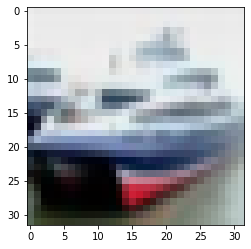

In [24]:
plt.imshow(X_test[1])

In [18]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Build CNN Model

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3, 3), padding ='same', activation= 'relu', input_shape = [32,32,3]))   #  First 2D convolutional neural network
model.add(Conv2D(filters=32, kernel_size= (3, 3), padding ='same', activation= 'relu'))     # Second convolutional neural network
model.add(MaxPool2D(pool_size =(2,2), strides= 2, padding= 'valid'))   # reduce over head
model.add(Dropout(0.5))   # Prevent overfitting, 50% of input means 50% input data not consider in next stage
model.add(Flatten())   
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units= 10, activation='softmax'))


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])

In [29]:
history = model.fit(X_train, y_train, batch_size= 10, epochs= 10, verbose= 1, validation_data =(X_test, y_test)) # it willl take around 45 minutes to run for 10 epochs on TPU or GPU

Epoch 1/10
5000/5000 [==============================] - 209s 42ms/step - loss: 1.3799 - sparse_categorical_accuracy: 0.5082 - val_loss: 1.0744 - val_sparse_categorical_accuracy: 0.6167
Epoch 2/10
5000/5000 [==============================] - 203s 41ms/step - loss: 1.0688 - sparse_categorical_accuracy: 0.6209 - val_loss: 1.0075 - val_sparse_categorical_accuracy: 0.6471
Epoch 3/10
5000/5000 [==============================] - 203s 41ms/step - loss: 0.9455 - sparse_categorical_accuracy: 0.6668 - val_loss: 0.9265 - val_sparse_categorical_accuracy: 0.6785
Epoch 4/10
5000/5000 [==============================] - 203s 41ms/step - loss: 0.8537 - sparse_categorical_accuracy: 0.6981 - val_loss: 0.9156 - val_sparse_categorical_accuracy: 0.6846
Epoch 5/10
5000/5000 [==============================] - 202s 40ms/step - loss: 0.7847 - sparse_categorical_accuracy: 0.7247 - val_loss: 0.9305 - val_sparse_categorical_accuracy: 0.6747
Epoch 6/10
5000/5000 [==============================] - 206s 41ms/step - lo

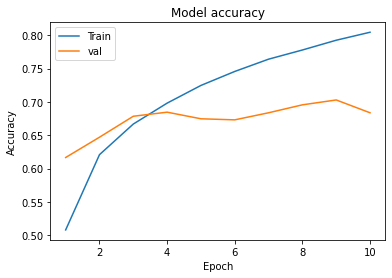

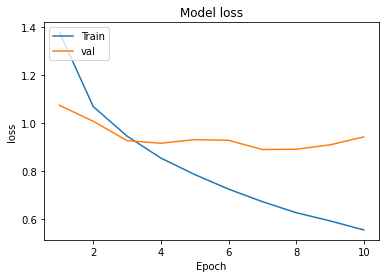

In [30]:
# plot training and validation accuracy values
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper left')
plt.show()


In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [38]:
#y_pred = model.predict(X_test)  # model.predict_class removed after tensorflow version 2.5 :)
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [39]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [40]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[693,  28,  45,  31,  13,  13,   8,  17, 100,  52],
       [  8, 836,   5,  10,   1,  10,   6,   4,  39,  81],
       [ 53,  10, 463,  76,  86, 151,  70,  61,  16,  14],
       [ 16,  16,  46, 416,  37, 340,  50,  46,  15,  18],
       [ 20,   5,  51,  73, 569,  98,  49, 119,  12,   4],
       [ 12,   3,  28, 125,  30, 713,  21,  54,   8,   6],
       [ 11,   3,  31,  80,  35,  90, 724,  12,  10,   4],
       [ 12,   3,  22,  46,  32,  87,   5, 765,   3,  25],
       [ 38,  33,  12,   8,   5,   9,   6,   3, 854,  32],
       [ 20,  92,   5,  17,   1,  11,   3,  10,  37, 804]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2671ded8d0>)

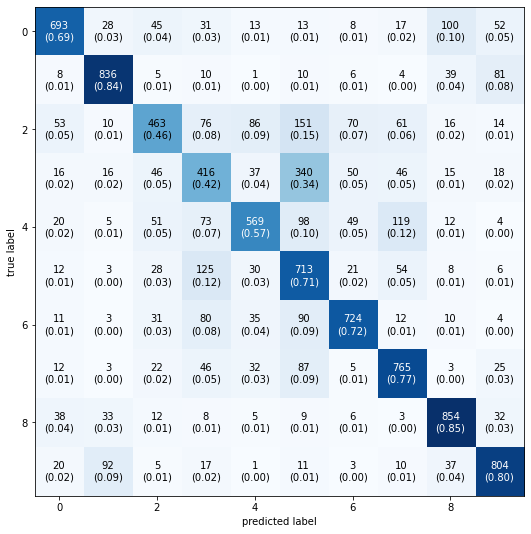

In [54]:
plot_confusion_matrix(mat, figsize=(9,9),show_normed=True)
#help(plot_confusion_matrix)